# Part 2: Predicting Customer Churn using Neural Networks
Objective: The objective of this assignment is to develop a neural-network model that can predict customer churn for a telecom company. You will use a dataset containing customer information, and whether or not the customer churned.
Tasks:


In [3]:
#Importing all required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, optimizers

from imblearn.combine import SMOTEENN

import warnings
warnings.filterwarnings("ignore")

1. Downloaded data from kaggle and reading the data

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2.	Load the dataset and perform exploratory data analysis.

In [5]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
538,8905-IAZPF,Female,0,Yes,No,69,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),95.65,6744.2,No
3711,4877-TSOFF,Female,0,Yes,Yes,55,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,One year,Yes,Bank transfer (automatic),75.75,4264.25,No
7013,1685-BQULA,Female,0,No,No,40,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),93.40,3756.4,No
3558,8417-GSODA,Male,0,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,No,Bank transfer (automatic),92.20,2568.15,No
6100,3565-UNOCC,Female,1,Yes,No,29,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),99.05,2952.85,Yes


In [6]:
#Shape of the data
df.shape

(7043, 21)

In [7]:
#Columns in the data
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#Summary stats of quantitative 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#Checking Datatypes of the dataframe
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [11]:
#Channging the column TotalCharges to Numberic
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
#Finding Missing Values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
#Dropping missing values as there are only 11 its not going to impact much
df= df.dropna()

In [15]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
#set to display max coloumns
pd.set_option('display.max_columns', None)
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
223,0742-MOABM,Male,0,Yes,No,4,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Mailed check,50.05,179.35,Yes
762,7379-POKDZ,Male,0,Yes,No,3,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,208.85,Yes
1966,3723-BFBGR,Male,1,No,No,24,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,No,Credit card (automatic),54.80,1291.30,No
763,1266-NZYUI,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,No,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),66.85,4758.80,No
4104,3345-PBBFH,Male,0,Yes,No,8,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),49.55,393.45,No
5458,2207-OBZNX,Male,0,No,No,7,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,51.00,354.05,Yes
6074,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
6361,5309-TAIKL,Female,0,No,No,7,Yes,No,DSL,No,No,Yes,Yes,No,Yes,Month-to-month,No,Bank transfer (automatic),62.80,418.30,No
2597,5945-AZYHT,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,109.60,7854.15,No
4744,6139-ZZRBQ,Male,1,No,No,64,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.05,1198.05,No


Text(0.5, 1.0, 'Churn vs Tenure')

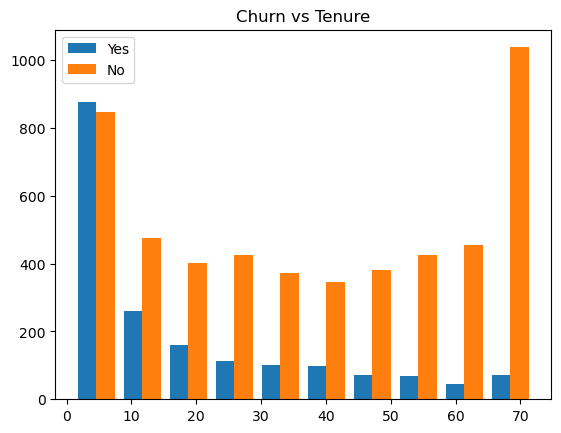

In [17]:
#Plotting Churn vs Tenure in the data
TenurechurnYes= df[df.Churn == 'Yes'].tenure
TenurechurnNo= df[df.Churn == 'No'].tenure
plt.hist([TenurechurnYes,TenurechurnNo],label=['Yes','No'])
plt.legend()
plt.title('Churn vs Tenure')

We can infer the churn rates are dropping periodically.

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# 3.	Pre-process the data by converting categorical variables to numerical variables, and scaling the data.

In [19]:
#Performing Scaling on the data
standardsclaer = MinMaxScaler()
for i in ['tenure','MonthlyCharges','TotalCharges']:
    df[[i]] = standardsclaer.fit_transform(df[[i]])

In [20]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,0.000000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,No
1,5575-GNVDE,Male,0,No,No,0.464789,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.215867,No
2,3668-QPYBK,Male,0,No,No,0.014085,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,Yes
3,7795-CFOCW,Male,0,No,No,0.619718,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.210241,No
4,9237-HQITU,Female,0,No,No,0.014085,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,0.323944,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0.662189,0.227521,No
7039,2234-XADUH,Female,0,Yes,Yes,1.000000,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0.845274,0.847461,No
7040,4801-JZAZL,Female,0,Yes,Yes,0.140845,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.112935,0.037809,No
7041,8361-LTMKD,Male,1,Yes,No,0.042254,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0.558706,0.033210,Yes


In [21]:
#Label Encoding: Changing Categorical to numerical
labelencoder = LabelEncoder()
for i  in ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']:
    df[i] = labelencoder.fit_transform(df[i])

In [22]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1653,6625-FLENO,1,0,1,0,0.802817,1,0,2,1,1,1,1,1,1,2,0,3,0.024876,0.134682,0
2874,8347-GDTMP,0,0,1,0,0.887324,1,0,2,1,1,1,1,1,1,2,0,1,0.011940,0.139263,0
5449,5696-CEIQJ,1,0,1,1,0.929577,1,0,1,0,2,2,2,2,2,2,0,0,0.844776,0.793526,0
6196,2988-QRAJY,1,0,0,0,0.957746,1,2,1,2,2,2,0,2,2,2,1,1,0.913433,0.855291,0
2923,4402-FTBXC,1,0,0,0,0.746479,1,0,1,2,0,2,0,2,0,0,0,3,0.711940,0.536372,0


In [23]:
#Rechecking Dtypes
df.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure              float64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

# 4.	Split the data set in train (80%) and test (20%) sets. Train the model using the training set.

In [24]:
X=df.drop(['customerID','Churn'],axis=1)
Y = df['Churn']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [25]:
print('X Train Shape',X_train.shape)
print('X Test Shape',X_test.shape)
print('Y Train Shape',Y_train.shape)
print('Y Test Shape',Y_test.shape)

X Train Shape (5625, 19)
X Test Shape (1407, 19)
Y Train Shape (5625,)
Y Test Shape (1407,)


# 5.	Build a neural-network model using PyTorch (or other library of your choice) to predict customer churn.


In [26]:
#Using Tensor flow to solve this 
#Builing a neural network with 3 layers and activation function as relu

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(10,input_shape=(19,),name='dense_Layer', activation='relu'))
model.add(keras.layers.Dense(30,input_shape=(10,),name='dense_Layer1', activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid')) #Using sigmoid because we have classification problem and there are two problems


# 6.	Evaluate the model using the testing set and report the accuracy, precision, recall, and F1 score

In [27]:
#Using adam as optimizer and loss function as binary cross entropy 
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy',metrics = ['accuracy','precision','recall','F1Score'])
history = model.fit(X_train, Y_train, epochs = 150, validation_data=(X_test, Y_test))


Epoch 1/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - F1Score: 0.4035 - accuracy: 0.5371 - loss: 0.6893 - precision: 0.2496 - recall: 0.4106 - val_F1Score: 0.4401 - val_accuracy: 0.7178 - val_loss: 0.5809 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - F1Score: 0.4174 - accuracy: 0.7362 - loss: 0.5603 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_F1Score: 0.4401 - val_accuracy: 0.7178 - val_loss: 0.5416 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - F1Score: 0.4323 - accuracy: 0.7241 - loss: 0.5394 - precision: 0.0835 - recall: 3.0414e-04 - val_F1Score: 0.4401 - val_accuracy: 0.7193 - val_loss: 0.5161 - val_precision: 0.7500 - val_recall: 0.0076
Epoch 4/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - F1Score: 0.4194 - accuracy: 0.7379 - loss: 0.5070 - precision: 0.5893 - recall: 0.0400 - val_F1Score: 0.4401 - val_accuracy: 0.7392 - val_loss: 0.4924 - val_precisi

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - F1Score: 0.4105 - accuracy: 0.8019 - loss: 0.4287 - precision: 0.6607 - recall: 0.4772 - val_F1Score: 0.4401 - val_accuracy: 0.8067 - val_loss: 0.4036 - val_precision: 0.7133 - val_recall: 0.5264
Epoch 30/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - F1Score: 0.4084 - accuracy: 0.7884 - loss: 0.4353 - precision: 0.6193 - recall: 0.4564 - val_F1Score: 0.4401 - val_accuracy: 0.8088 - val_loss: 0.4022 - val_precision: 0.7000 - val_recall: 0.5642
Epoch 31/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - F1Score: 0.4241 - accuracy: 0.7831 - loss: 0.4355 - precision: 0.6192 - recall: 0.5059 - val_F1Score: 0.4401 - val_accuracy: 0.8045 - val_loss: 0.4042 - val_precision: 0.7293 - val_recall: 0.4887
Epoch 32/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - F1Score: 0.4107 - accuracy: 0.7922 - loss: 0.4328 - precision: 0.6329 - recall: 0.4665 - val_F1Score: 0.4401 - val_accuracy: 0.8017 - val_loss: 0.4041 - val_precision: 0.7305 - val_recall: 0.4710
Epoch

Epoch 58/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - F1Score: 0.4262 - accuracy: 0.7953 - loss: 0.4234 - precision: 0.6518 - recall: 0.5220 - val_F1Score: 0.4401 - val_accuracy: 0.8053 - val_loss: 0.4026 - val_precision: 0.7552 - val_recall: 0.4584
Epoch 59/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - F1Score: 0.4119 - accuracy: 0.7972 - loss: 0.4278 - precision: 0.6470 - recall: 0.4805 - val_F1Score: 0.4401 - val_accuracy: 0.8102 - val_loss: 0.3960 - val_precision: 0.6935 - val_recall: 0.5869
Epoch 60/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - F1Score: 0.4145 - accuracy: 0.7902 - loss: 0.4320 - precision: 0.6253 - recall: 0.4918 - val_F1Score: 0.4401 - val_accuracy: 0.8045 - val_loss: 0.4023 - val_precision: 0.7500 - val_recall: 0.4610
Epoch 61/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - F1Score: 0.4137 - accuracy: 0.7984 - loss: 0.4333 - precision: 0.6561 - recall: 0.4786 - val_F1Score: 0.4401 - val_accuracy: 0.8074 - val_loss: 0.3975 - val_precision: 0.7386 - val_recall:

Epoch 87/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - F1Score: 0.4189 - accuracy: 0.8070 - loss: 0.4179 - precision: 0.6842 - recall: 0.5108 - val_F1Score: 0.4401 - val_accuracy: 0.8131 - val_loss: 0.3975 - val_precision: 0.7410 - val_recall: 0.5189
Epoch 88/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - F1Score: 0.4078 - accuracy: 0.7998 - loss: 0.4153 - precision: 0.6392 - recall: 0.5031 - val_F1Score: 0.4401 - val_accuracy: 0.8074 - val_loss: 0.3962 - val_precision: 0.6842 - val_recall: 0.5894
Epoch 89/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - F1Score: 0.4320 - accuracy: 0.7953 - loss: 0.4327 - precision: 0.6532 - recall: 0.5436 - val_F1Score: 0.4401 - val_accuracy: 0.8202 - val_loss: 0.3956 - val_precision: 0.7384 - val_recall: 0.5617
Epoch 90/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - F1Score: 0.4137 - accuracy: 0.7921 - loss: 0.4290 - precision: 0.6296 - recall: 0.4924 - val_F1Score: 0.4401 - val_accuracy: 0.8102 - val_loss: 0.3957 - val_precision: 0.6836 - val_recall:

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - F1Score: 0.4134 - accuracy: 0.8096 - loss: 0.4099 - precision: 0.6642 - recall: 0.5439 - val_F1Score: 0.4401 - val_accuracy: 0.8181 - val_loss: 0.3967 - val_precision: 0.7406 - val_recall: 0.5466
Epoch 116/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - F1Score: 0.4145 - accuracy: 0.7913 - loss: 0.4264 - precision: 0.6278 - recall: 0.4962 - val_F1Score: 0.4401 - val_accuracy: 0.8166 - val_loss: 0.3969 - val_precision: 0.7405 - val_recall: 0.5390
Epoch 117/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - F1Score: 0.4100 - accuracy: 0.8039 - loss: 0.4176 - precision: 0.6538 - recall: 0.5087 - val_F1Score: 0.4401 - val_accuracy: 0.8202 - val_loss: 0.3966 - val_precision: 0.7308 - val_recall: 0.5743
Epoch 118/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - F1Score: 0.4029 - accuracy: 0.8125 - loss: 0.4098 - precision: 0.6609 - recall: 0.5285 - val_F1Score: 0.4401 - val_accuracy: 0.8088 - val_loss: 0.4020 - val_precision: 0.7462 - val_recall: 0.4887
Ep

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - F1Score: 0.4148 - accuracy: 0.8000 - loss: 0.4220 - precision: 0.6454 - recall: 0.5246 - val_F1Score: 0.4401 - val_accuracy: 0.8152 - val_loss: 0.3983 - val_precision: 0.7338 - val_recall: 0.5416
Epoch 144/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - F1Score: 0.4201 - accuracy: 0.8005 - loss: 0.4164 - precision: 0.6616 - recall: 0.5151 - val_F1Score: 0.4401 - val_accuracy: 0.8166 - val_loss: 0.3985 - val_precision: 0.7388 - val_recall: 0.5416
Epoch 145/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - F1Score: 0.4098 - accuracy: 0.8011 - loss: 0.4218 - precision: 0.6454 - recall: 0.5072 - val_F1Score: 0.4401 - val_accuracy: 0.8166 - val_loss: 0.3973 - val_precision: 0.7279 - val_recall: 0.5592
Epoch 146/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - F1Score: 0.4287 - accuracy: 0.8050 - loss: 0.4179 - precision: 0.6754 - recall: 0.5455 - val_F1Score: 0.4401 - val_accuracy: 0.8045 - val_loss: 0.3986 - val_precision: 0.6685 - val_recall: 0.6096
Ep

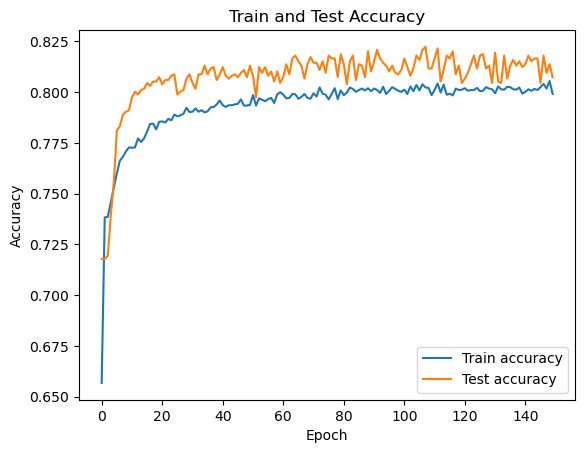

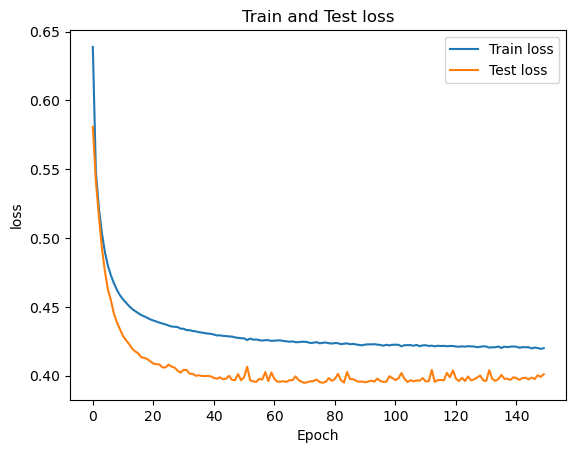

In [28]:
#plotting test vs train accuracies and losses 
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Train and Test loss')
plt.legend()
plt.show()


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_Layer (Dense)                  │ (None, 10)                  │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_Layer1 (Dense)                 │ (None, 30)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 563 (2.20 KB)

 Trainable params: 561 (2.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

From the we can infer that the train accuracy being 80% and test accuracy being 80% it clearly says the model is not overfitting.
The train and test loss are also decreased gradually we can observe that in the graph.
Test Precision and recall are being 0.62 and 0.5477 it says there is a chance of improvement

Interpretation of the metrics:
    test accuracy being 80 says in 10 predictions 2 predictions are being made wrong.
    

# 7.	Experiment with different hyperparameters (layer count and neurons per layer) and architectures to improve the performance of the model.

In [30]:
model2 = tf.keras.models.Sequential([
    layers.Dense(15, input_shape=(19,), name='dense_Layer0', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(10, input_shape=(15,),name='dense_Layer1', activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    layers.Dense(25, input_shape=(10,),name='dense_Layer2', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(30, input_shape=(25,),name='dense_Layer3', activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    layers.Dense(35, input_shape=(30,),name='dense_Layer4', activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    layers.Dense(1, input_shape=(35,),activation='sigmoid')
])
adam = optimizers.Adam(learning_rate=0.0003, amsgrad=False)
model2.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy','precision','recall','F1Score'])

# Train the model
history2 = model2.fit(X_train, Y_train,batch_size = 128, epochs=120, validation_data=(X_test, Y_test))


Epoch 1/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - F1Score: 0.4050 - accuracy: 0.7458 - loss: 4.1728 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_F1Score: 0.4401 - val_accuracy: 0.7178 - val_loss: 3.9432 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4205 - accuracy: 0.7337 - loss: 3.8623 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_F1Score: 0.4401 - val_accuracy: 0.7178 - val_loss: 3.6494 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4068 - accuracy: 0.7446 - loss: 3.5689 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_F1Score: 0.4401 - val_accuracy: 0.7178 - val_loss: 3.3890 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4243 - accuracy: 0.7306 - loss: 3.3224 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_F1Score: 0.4401 - val_accuracy: 0.7178 - val_loss:

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4167 - accuracy: 0.7653 - loss: 0.6209 - precision: 0.6168 - recall: 0.2881 - val_F1Score: 0.4401 - val_accuracy: 0.7846 - val_loss: 0.6034 - val_precision: 0.7701 - val_recall: 0.3375
Epoch 30/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4187 - accuracy: 0.7645 - loss: 0.6256 - precision: 0.6250 - recall: 0.2810 - val_F1Score: 0.4401 - val_accuracy: 0.7825 - val_loss: 0.5959 - val_precision: 0.7862 - val_recall: 0.3149
Epoch 31/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4052 - accuracy: 0.7724 - loss: 0.6072 - precision: 0.6373 - recall: 0.2408 - val_F1Score: 0.4401 - val_accuracy: 0.7896 - val_loss: 0.5884 - val_precision: 0.7790 - val_recall: 0.3552
Epoch 32/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4171 - accuracy: 0.7679 - loss: 0.6073 - precision: 0.6306 - recall: 0.2876 - val_F1Score: 0.4401 - val_accuracy: 0.7882 - val_loss: 0.5824 - val_precision: 0.7829 - val_recall: 0.3451
Epoch 33/120


Epoch 58/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4169 - accuracy: 0.7767 - loss: 0.5562 - precision: 0.6253 - recall: 0.3806 - val_F1Score: 0.4401 - val_accuracy: 0.7918 - val_loss: 0.5257 - val_precision: 0.7241 - val_recall: 0.4232
Epoch 59/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4067 - accuracy: 0.7774 - loss: 0.5565 - precision: 0.6141 - recall: 0.3401 - val_F1Score: 0.4401 - val_accuracy: 0.7939 - val_loss: 0.5247 - val_precision: 0.7277 - val_recall: 0.4307
Epoch 60/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4154 - accuracy: 0.7803 - loss: 0.5496 - precision: 0.6334 - recall: 0.3811 - val_F1Score: 0.4401 - val_accuracy: 0.7939 - val_loss: 0.5240 - val_precision: 0.7421 - val_recall: 0.4131
Epoch 61/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - F1Score: 0.4132 - accuracy: 0.7819 - loss: 0.5433 - precision: 0.6428 - recall: 0.3662 - val_F1Score: 0.4401 - val_accuracy: 0.7953 - val_loss: 0.5227 - val_precision: 0.7280 - val_recall: 0.4383


Epoch 87/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4126 - accuracy: 0.7853 - loss: 0.5261 - precision: 0.6302 - recall: 0.4234 - val_F1Score: 0.4401 - val_accuracy: 0.8038 - val_loss: 0.5038 - val_precision: 0.7318 - val_recall: 0.4811
Epoch 88/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4190 - accuracy: 0.7813 - loss: 0.5257 - precision: 0.6386 - recall: 0.4031 - val_F1Score: 0.4401 - val_accuracy: 0.8045 - val_loss: 0.5030 - val_precision: 0.7328 - val_recall: 0.4836
Epoch 89/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4120 - accuracy: 0.7848 - loss: 0.5245 - precision: 0.6363 - recall: 0.3958 - val_F1Score: 0.4401 - val_accuracy: 0.8031 - val_loss: 0.5026 - val_precision: 0.7308 - val_recall: 0.4786
Epoch 90/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4107 - accuracy: 0.7853 - loss: 0.5186 - precision: 0.6246 - recall: 0.4251 - val_F1Score: 0.4401 - val_accuracy: 0.8053 - val_loss: 0.5017 - val_precision: 0.7303 - val_recall: 0.4912


Epoch 116/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4223 - accuracy: 0.7820 - loss: 0.5237 - precision: 0.6445 - recall: 0.4163 - val_F1Score: 0.4401 - val_accuracy: 0.8024 - val_loss: 0.4902 - val_precision: 0.7371 - val_recall: 0.4660
Epoch 117/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4150 - accuracy: 0.7908 - loss: 0.5146 - precision: 0.6553 - recall: 0.4252 - val_F1Score: 0.4401 - val_accuracy: 0.8038 - val_loss: 0.4892 - val_precision: 0.7300 - val_recall: 0.4836
Epoch 118/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4234 - accuracy: 0.7830 - loss: 0.5257 - precision: 0.6439 - recall: 0.4291 - val_F1Score: 0.4401 - val_accuracy: 0.8031 - val_loss: 0.4888 - val_precision: 0.7290 - val_recall: 0.4811
Epoch 119/120
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4190 - accuracy: 0.7798 - loss: 0.5259 - precision: 0.6332 - recall: 0.4021 - val_F1Score: 0.4401 - val_accuracy: 0.8045 - val_loss: 0.4885 - val_precision: 0.7328 - val_recall: 0.4

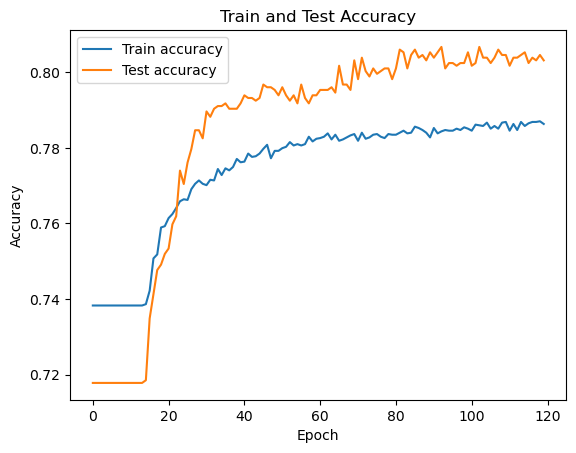

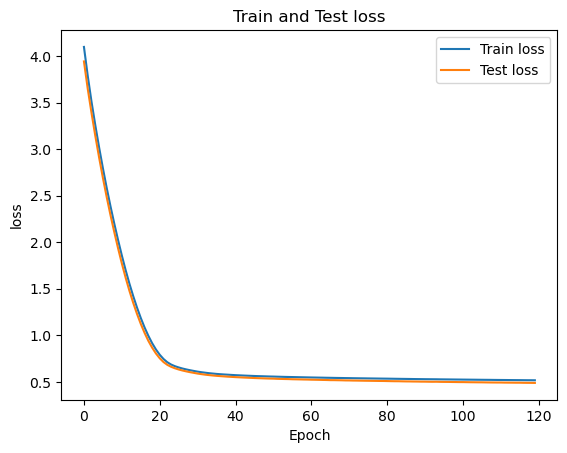

In [31]:
#plotting test vs train accuracies and losses 
plt.plot(history2.history['accuracy'], label='Train accuracy')
plt.plot(history2.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.legend()
plt.show()

plt.plot(history2.history['loss'], label='Train loss')
plt.plot(history2.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Train and Test loss')
plt.legend()
plt.show()


In [32]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_Layer0 (Dense)                 │ (None, 15)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_Layer1 (Dense)                 │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_Layer2 (Dense)                 │ (None, 25)                  │             275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_Layer3 (Dense)                 │ (None, 30)                  │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_Layer4 (Dense)                 │ (None, 35)                  │           1,085 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,910 (30.90 KB)

 Trainable params: 2,636 (10.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,274 (20.61 KB)

With this model we have minimised the test loss using regularizers.

In [33]:
model3 = tf.keras.models.Sequential([
    layers.Dense(15, input_shape=(19,), name='dense_Layer0', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(25, name='dense_Layer1', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(45, name='dense_Layer2', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])
adam = optimizers.Adam(learning_rate=0.0003, amsgrad=False)
model3.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy','precision','recall','F1Score'])

# Train the model
history3 = model3.fit(X_train, Y_train,batch_size = 128, epochs=150, validation_data=(X_test, Y_test))


Epoch 1/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - F1Score: 0.4118 - accuracy: 0.5619 - loss: 1.3747 - precision: 0.2121 - recall: 0.2492 - val_F1Score: 0.4401 - val_accuracy: 0.7178 - val_loss: 1.2550 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4163 - accuracy: 0.7237 - loss: 1.2466 - precision: 0.3054 - recall: 0.0403 - val_F1Score: 0.4401 - val_accuracy: 0.7178 - val_loss: 1.1666 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4120 - accuracy: 0.7387 - loss: 1.1629 - precision: 0.3819 - recall: 0.0152 - val_F1Score: 0.4401 - val_accuracy: 0.7178 - val_loss: 1.0988 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4037 - accuracy: 0.7469 - loss: 1.0891 - precision: 0.4869 - recall: 0.0165 - val_F1Score: 0.4401 - val_accuracy: 0.7178 - val_loss: 1.0400 - val_precision: 0.0000e

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - F1Score: 0.4059 - accuracy: 0.7765 - loss: 0.5505 - precision: 0.6395 - recall: 0.2809 - val_F1Score: 0.4401 - val_accuracy: 0.7918 - val_loss: 0.5154 - val_precision: 0.7549 - val_recall: 0.3879
Epoch 30/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4247 - accuracy: 0.7582 - loss: 0.5499 - precision: 0.6124 - recall: 0.2819 - val_F1Score: 0.4401 - val_accuracy: 0.7903 - val_loss: 0.5113 - val_precision: 0.7965 - val_recall: 0.3451
Epoch 31/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - F1Score: 0.4114 - accuracy: 0.7704 - loss: 0.5476 - precision: 0.6456 - recall: 0.2545 - val_F1Score: 0.4401 - val_accuracy: 0.7910 - val_loss: 0.5068 - val_precision: 0.7641 - val_recall: 0.3753
Epoch 32/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4291 - accuracy: 0.7619 - loss: 0.5505 - precision: 0.6298 - recall: 0.3092 - val_F1Score: 0.4401 - val_accuracy: 0.7903 - val_loss: 0.5025 - val_precision: 0.7742 - val_recall: 0.3627
Epoch 33/150


Epoch 58/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4123 - accuracy: 0.7862 - loss: 0.4808 - precision: 0.6536 - recall: 0.3760 - val_F1Score: 0.4401 - val_accuracy: 0.8053 - val_loss: 0.4534 - val_precision: 0.7303 - val_recall: 0.4912
Epoch 59/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4035 - accuracy: 0.7958 - loss: 0.4803 - precision: 0.6506 - recall: 0.4146 - val_F1Score: 0.4401 - val_accuracy: 0.8003 - val_loss: 0.4534 - val_precision: 0.7417 - val_recall: 0.4484
Epoch 60/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4086 - accuracy: 0.7825 - loss: 0.4808 - precision: 0.6250 - recall: 0.3856 - val_F1Score: 0.4401 - val_accuracy: 0.8024 - val_loss: 0.4530 - val_precision: 0.7429 - val_recall: 0.4584
Epoch 61/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4194 - accuracy: 0.7843 - loss: 0.4858 - precision: 0.6526 - recall: 0.3997 - val_F1Score: 0.4401 - val_accuracy: 0.8031 - val_loss: 0.4520 - val_precision: 0.7362 - val_recall: 0.4710


Epoch 87/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4182 - accuracy: 0.7766 - loss: 0.4848 - precision: 0.6259 - recall: 0.3854 - val_F1Score: 0.4401 - val_accuracy: 0.8045 - val_loss: 0.4418 - val_precision: 0.7563 - val_recall: 0.4534
Epoch 88/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4140 - accuracy: 0.7941 - loss: 0.4741 - precision: 0.6734 - recall: 0.4113 - val_F1Score: 0.4401 - val_accuracy: 0.8117 - val_loss: 0.4381 - val_precision: 0.7200 - val_recall: 0.5441
Epoch 89/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4150 - accuracy: 0.7831 - loss: 0.4803 - precision: 0.6200 - recall: 0.4437 - val_F1Score: 0.4401 - val_accuracy: 0.8024 - val_loss: 0.4400 - val_precision: 0.7371 - val_recall: 0.4660
Epoch 90/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.4143 - accuracy: 0.7938 - loss: 0.4654 - precision: 0.6642 - recall: 0.4288 - val_F1Score: 0.4401 - val_accuracy: 0.8088 - val_loss: 0.4381 - val_precision: 0.7254 - val_recall: 0.5189


Epoch 116/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4129 - accuracy: 0.7908 - loss: 0.4643 - precision: 0.6439 - recall: 0.4386 - val_F1Score: 0.4401 - val_accuracy: 0.8031 - val_loss: 0.4339 - val_precision: 0.7400 - val_recall: 0.4660
Epoch 117/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4191 - accuracy: 0.7909 - loss: 0.4802 - precision: 0.6657 - recall: 0.4257 - val_F1Score: 0.4401 - val_accuracy: 0.8045 - val_loss: 0.4324 - val_precision: 0.7311 - val_recall: 0.4861
Epoch 118/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4015 - accuracy: 0.7900 - loss: 0.4613 - precision: 0.6177 - recall: 0.4310 - val_F1Score: 0.4401 - val_accuracy: 0.8117 - val_loss: 0.4316 - val_precision: 0.7276 - val_recall: 0.5315
Epoch 119/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4281 - accuracy: 0.7788 - loss: 0.4827 - precision: 0.6298 - recall: 0.4567 - val_F1Score: 0.4401 - val_accuracy: 0.8067 - val_loss: 0.4325 - val_precision: 0.7323 - val_recall: 0.4

Epoch 145/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4198 - accuracy: 0.7891 - loss: 0.4726 - precision: 0.6425 - recall: 0.4655 - val_F1Score: 0.4401 - val_accuracy: 0.8060 - val_loss: 0.4311 - val_precision: 0.7605 - val_recall: 0.4559
Epoch 146/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4140 - accuracy: 0.7913 - loss: 0.4679 - precision: 0.6507 - recall: 0.4327 - val_F1Score: 0.4401 - val_accuracy: 0.8053 - val_loss: 0.4297 - val_precision: 0.7450 - val_recall: 0.4710
Epoch 147/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4246 - accuracy: 0.7758 - loss: 0.4763 - precision: 0.6139 - recall: 0.4534 - val_F1Score: 0.4401 - val_accuracy: 0.8045 - val_loss: 0.4308 - val_precision: 0.7521 - val_recall: 0.4584
Epoch 148/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.4185 - accuracy: 0.7772 - loss: 0.4790 - precision: 0.6152 - recall: 0.4235 - val_F1Score: 0.4401 - val_accuracy: 0.8031 - val_loss: 0.4296 - val_precision: 0.7381 - val_recall: 0.4

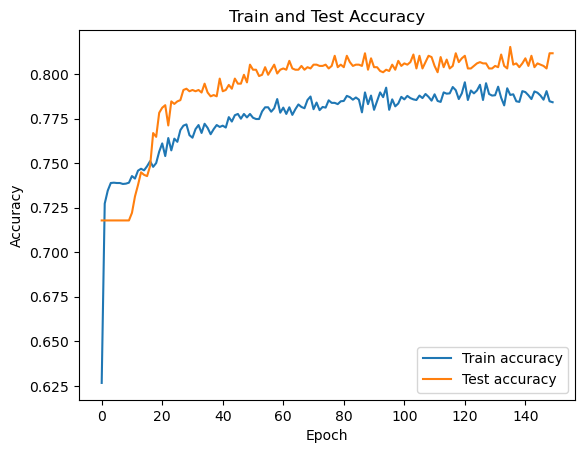

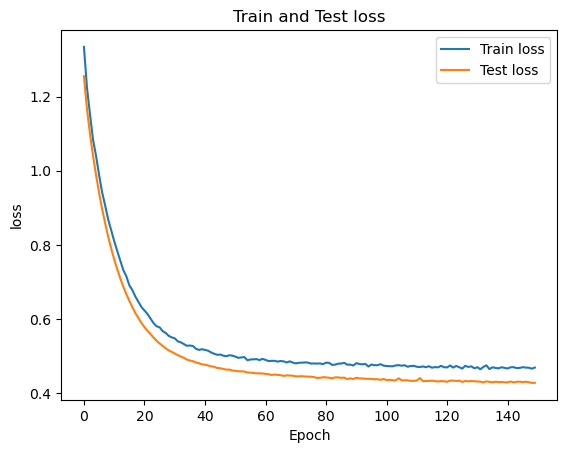

In [34]:
plt.plot(history3.history['accuracy'], label='Train accuracy')
plt.plot(history3.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.legend()
plt.show()

plt.plot(history3.history['loss'], label='Train loss')
plt.plot(history3.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Train and Test loss')
plt.legend()
plt.show()


model3.summary()

In this model 3 we can see test accuracy got increased as we have used drop out and regularizers.

In [35]:
sm = SMOTEENN()

In [36]:
X_resetTrain, y_resetTrain = sm.fit_resample(X, Y)

Xre_train, Xre_test, yre_train, yre_test = train_test_split(X_resetTrain, y_resetTrain, test_size=0.2)


In [37]:
model4 = tf.keras.models.Sequential([
    layers.Dense(15, input_shape=(19,), name='dense_Layer0', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(25, name='dense_Layer1', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(25, name='dense_Layer2', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])
adam = optimizers.Adam(learning_rate=0.003, amsgrad=False)
model4.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy','precision','recall','F1Score'])

# Train the model
history4 = model4.fit(Xre_train, yre_train,batch_size = 200, epochs=150, validation_data=(Xre_test, yre_test))


Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - F1Score: 0.7222 - accuracy: 0.4918 - loss: 1.3477 - precision: 0.5441 - recall: 0.3300 - val_F1Score: 0.7088 - val_accuracy: 0.8130 - val_loss: 0.9755 - val_precision: 0.7756 - val_recall: 0.9277
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - F1Score: 0.7257 - accuracy: 0.7733 - loss: 0.9091 - precision: 0.7986 - recall: 0.8066 - val_F1Score: 0.7088 - val_accuracy: 0.8761 - val_loss: 0.6258 - val_precision: 0.8947 - val_recall: 0.8776
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.7252 - accuracy: 0.8493 - loss: 0.6694 - precision: 0.8781 - recall: 0.8542 - val_F1Score: 0.7088 - val_accuracy: 0.8972 - val_loss: 0.5076 - val_precision: 0.8953 - val_recall: 0.9204
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.7161 - accuracy: 0.8757 - loss: 0.5458 - precision: 0.8778 - recall: 0.9027 - val_F1Score: 0.7088 - val_accuracy: 0.9020 - val_loss: 0.4339 - val_precision: 0.8939 - val_recall: 0.9322
Epo

Epoch 30/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.7181 - accuracy: 0.9161 - loss: 0.2701 - precision: 0.9174 - recall: 0.9344 - val_F1Score: 0.7088 - val_accuracy: 0.9231 - val_loss: 0.2574 - val_precision: 0.9100 - val_recall: 0.9543
Epoch 31/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - F1Score: 0.7111 - accuracy: 0.9118 - loss: 0.2724 - precision: 0.9045 - recall: 0.9396 - val_F1Score: 0.7088 - val_accuracy: 0.9215 - val_loss: 0.2553 - val_precision: 0.9121 - val_recall: 0.9484
Epoch 32/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.7154 - accuracy: 0.9107 - loss: 0.2715 - precision: 0.9139 - recall: 0.9269 - val_F1Score: 0.7088 - val_accuracy: 0.9182 - val_loss: 0.2634 - val_precision: 0.8968 - val_recall: 0.9617
Epoch 33/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.7137 - accuracy: 0.9141 - loss: 0.2628 - precision: 0.9140 - recall: 0.9330 - val_F1Score: 0.7088 - val_accuracy: 0.9182 - val_loss: 0.2547 - val_precision: 0.9024 - val_recall: 0.9543


Epoch 59/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - F1Score: 0.7227 - accuracy: 0.9156 - loss: 0.2579 - precision: 0.9168 - recall: 0.9358 - val_F1Score: 0.7088 - val_accuracy: 0.9182 - val_loss: 0.2478 - val_precision: 0.9001 - val_recall: 0.9572
Epoch 60/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.7181 - accuracy: 0.9245 - loss: 0.2436 - precision: 0.9239 - recall: 0.9429 - val_F1Score: 0.7088 - val_accuracy: 0.9182 - val_loss: 0.2477 - val_precision: 0.9104 - val_recall: 0.9440
Epoch 61/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.7165 - accuracy: 0.9207 - loss: 0.2549 - precision: 0.9127 - recall: 0.9488 - val_F1Score: 0.7088 - val_accuracy: 0.9215 - val_loss: 0.2477 - val_precision: 0.9052 - val_recall: 0.9572
Epoch 62/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.7121 - accuracy: 0.9150 - loss: 0.2647 - precision: 0.9135 - recall: 0.9346 - val_F1Score: 0.7088 - val_accuracy: 0.9182 - val_loss: 0.2449 - val_precision: 0.9212 - val_recall: 0.9307


Epoch 88/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.7238 - accuracy: 0.9093 - loss: 0.2615 - precision: 0.9113 - recall: 0.9309 - val_F1Score: 0.7088 - val_accuracy: 0.9247 - val_loss: 0.2410 - val_precision: 0.9126 - val_recall: 0.9543
Epoch 89/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.7263 - accuracy: 0.9205 - loss: 0.2497 - precision: 0.9185 - recall: 0.9440 - val_F1Score: 0.7088 - val_accuracy: 0.9198 - val_loss: 0.2494 - val_precision: 0.8950 - val_recall: 0.9676
Epoch 90/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.7247 - accuracy: 0.9206 - loss: 0.2408 - precision: 0.9123 - recall: 0.9515 - val_F1Score: 0.7088 - val_accuracy: 0.9198 - val_loss: 0.2392 - val_precision: 0.9239 - val_recall: 0.9307
Epoch 91/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.7183 - accuracy: 0.9203 - loss: 0.2422 - precision: 0.9238 - recall: 0.9348 - val_F1Score: 0.7088 - val_accuracy: 0.9215 - val_loss: 0.2375 - val_precision: 0.9097 - val_recall: 0.9513


Epoch 117/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - F1Score: 0.7150 - accuracy: 0.9233 - loss: 0.2399 - precision: 0.9173 - recall: 0.9477 - val_F1Score: 0.7088 - val_accuracy: 0.9231 - val_loss: 0.2406 - val_precision: 0.9054 - val_recall: 0.9602
Epoch 118/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.7206 - accuracy: 0.9237 - loss: 0.2388 - precision: 0.9209 - recall: 0.9458 - val_F1Score: 0.7088 - val_accuracy: 0.9174 - val_loss: 0.2342 - val_precision: 0.9211 - val_recall: 0.9292
Epoch 119/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.7171 - accuracy: 0.9172 - loss: 0.2439 - precision: 0.9138 - recall: 0.9407 - val_F1Score: 0.7088 - val_accuracy: 0.9239 - val_loss: 0.2339 - val_precision: 0.9183 - val_recall: 0.9454
Epoch 120/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.7240 - accuracy: 0.9221 - loss: 0.2423 - precision: 0.9231 - recall: 0.9412 - val_F1Score: 0.7088 - val_accuracy: 0.9271 - val_loss: 0.2371 - val_precision: 0.9212 - val_recall: 0.9

Epoch 146/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.7242 - accuracy: 0.9166 - loss: 0.2390 - precision: 0.9063 - recall: 0.9515 - val_F1Score: 0.7088 - val_accuracy: 0.9190 - val_loss: 0.2431 - val_precision: 0.8948 - val_recall: 0.9661
Epoch 147/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - F1Score: 0.7225 - accuracy: 0.9206 - loss: 0.2396 - precision: 0.9142 - recall: 0.9487 - val_F1Score: 0.7088 - val_accuracy: 0.9239 - val_loss: 0.2341 - val_precision: 0.9183 - val_recall: 0.9454
Epoch 148/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - F1Score: 0.7177 - accuracy: 0.9162 - loss: 0.2405 - precision: 0.9119 - recall: 0.9417 - val_F1Score: 0.7088 - val_accuracy: 0.9182 - val_loss: 0.2387 - val_precision: 0.9287 - val_recall: 0.9218
Epoch 149/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - F1Score: 0.7192 - accuracy: 0.9198 - loss: 0.2390 - precision: 0.9165 - recall: 0.9435 - val_F1Score: 0.7088 - val_accuracy: 0.9206 - val_loss: 0.2366 - val_precision: 0.9143 - val_recall: 0.9

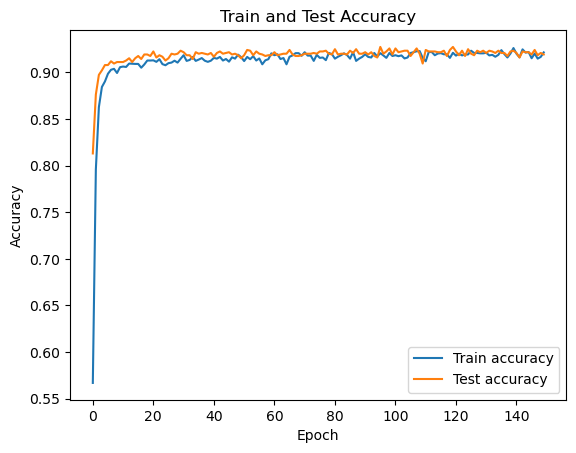

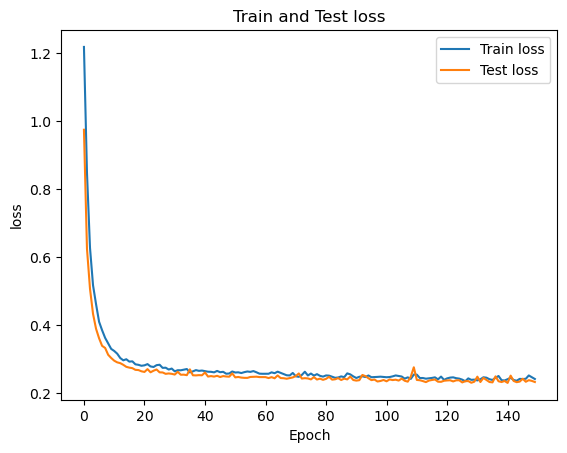

In [38]:
#plotting test vs train accuracies and losses 
plt.plot(history4.history['accuracy'], label='Train accuracy')
plt.plot(history4.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.legend()
plt.show()

plt.plot(history4.history['loss'], label='Train loss')
plt.plot(history4.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Train and Test loss')
plt.legend()
plt.show()

In [39]:
model_test_acc = history.history['accuracy'][-1]
model_train_acc = history.history['val_accuracy'][-1]
model2_test_acc = history2.history['accuracy'][-1]
model2_train_acc = history2.history['val_accuracy'][-1]
model3_test_acc = history3.history['accuracy'][-1]
model3_train_acc = history3.history['val_accuracy'][-1]
model4_test_acc = history4.history['accuracy'][-1]
model4_train_acc = history4.history['val_accuracy'][-1]

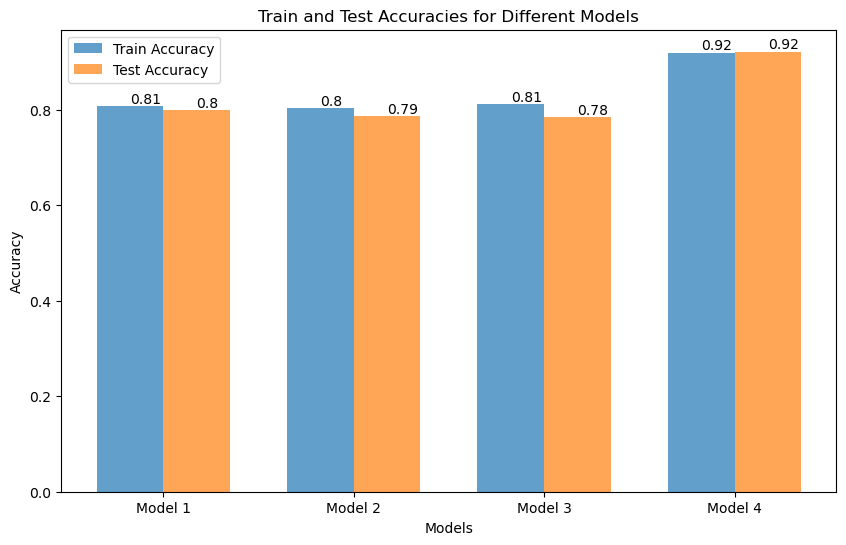

In [40]:
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

# Define train and test accuracies for each model
train_acc = [model_train_acc, model2_train_acc, model3_train_acc, model4_train_acc]
test_acc = [model_test_acc, model2_test_acc, model3_test_acc, model4_test_acc]

# Define the number of models and the width of each bar
num_models = len(model_names)
bar_width = 0.35

# Create index for the x-axis
index = np.arange(num_models)

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
train_bars = plt.bar(index - bar_width/2, train_acc, alpha=0.7, label='Train Accuracy', width=bar_width)
test_bars = plt.bar(index + bar_width/2, test_acc, alpha=0.7, label='Test Accuracy', width=bar_width)

# Add numbers on top of each bar
for bar in train_bars + test_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies for Different Models')
plt.xticks(index, model_names)
plt.legend()

# Show plot
plt.show()

In [41]:
X_resetTrain

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867
1,1,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241
2,0,0,0,0,0.126761,0,1,0,2,0,0,0,0,0,0,0,3,0.114428,0.032668
3,1,0,0,1,0.859155,1,0,0,2,2,0,0,0,0,1,0,0,0.377114,0.400317
4,1,0,1,1,0.169014,1,0,0,2,0,0,0,0,0,0,1,3,0.315423,0.065619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6170,1,0,0,0,0.572678,1,0,1,0,1,0,2,2,2,0,0,2,0.810466,0.478016
6171,0,0,0,0,0.004476,1,0,1,0,2,0,0,2,0,0,0,2,0.656344,0.010546
6172,0,0,0,0,0.513542,0,1,0,0,2,0,0,0,0,0,1,2,0.121867,0.130089
6173,1,0,1,0,0.378482,1,2,1,0,0,0,0,2,0,0,0,2,0.665133,0.273706


In [42]:
input_data = np.array([[1, 0, 1, 1, 0.1690114, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 3, 0.315423, 0.065619]])
# Convert the input data to a numpy array
input_array = np.array(input_data)

# Reshape the array to match the expected input shape of the model
input_array = input_array.reshape(1, -1)

# Use the model to make predictions
prediction = model4.predict(input_array)

# Print the prediction
print("Model Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Model Prediction: [[0.16734445]]


In [43]:
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_Layer0 (Dense)                 │ (None, 15)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_Layer1 (Dense)                 │ (None, 25)                  │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_Layer2 (Dense)                 │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,130 (16.14 KB)

 Trainable params: 1,376 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,754 (10.76 KB)